# create bathymetry map

In [9]:
install.packages('mapproj')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages('marmap')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [48]:
library(ggplot2)
library(cowplot)
library(mapdata)
library(marmap)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



-64.53,10.35,-64.9,10.78,

In [11]:
# get bathymetry data
b = getNOAA.bathy(lon1 = -68, lon2 = -63, lat1 = 9, lat2 = 13, 
                  resolution = 1)
## Querying NOAA database ...
## This may take seconds to minutes, depending on grid size
## Building bathy matrix ...

# make a simple track line
lin = data.frame(
  lon = c(-65.17536, -65.37423, -65.64541, -66.06122, -66.15161),  
  lat = c(43.30837, 42.94679, 42.87448, 42.92871, 42.72985)
)

# make a few points
pts = data.frame(
  lon = c(-64.67),
  lat = c(10.5)
)

# build a polygon (in this case the 'Roseway Basin Area To Be Avoided')
ply = data.frame(
  lon = c(-64.53,-64.53,-64.9, -64.9),
  lat = c(10.35,  10.78, 10.78, 10.35)
)

Querying NOAA database ...
This may take seconds to minutes, depending on grid size
Building bathy matrix ...


In [12]:
#head(fillbf)

In [208]:
library(RColorBrewer)
pal <- rev(brewer.pal(6,'Blues'))
ramp <- colorRampPalette(pal)



In [209]:
pal[1:4]
#ramp

[1] "#08519C" "#3182BD" "#6BAED6" "#9ECAE1"

In [210]:
library(lattice)
library(directlabels)

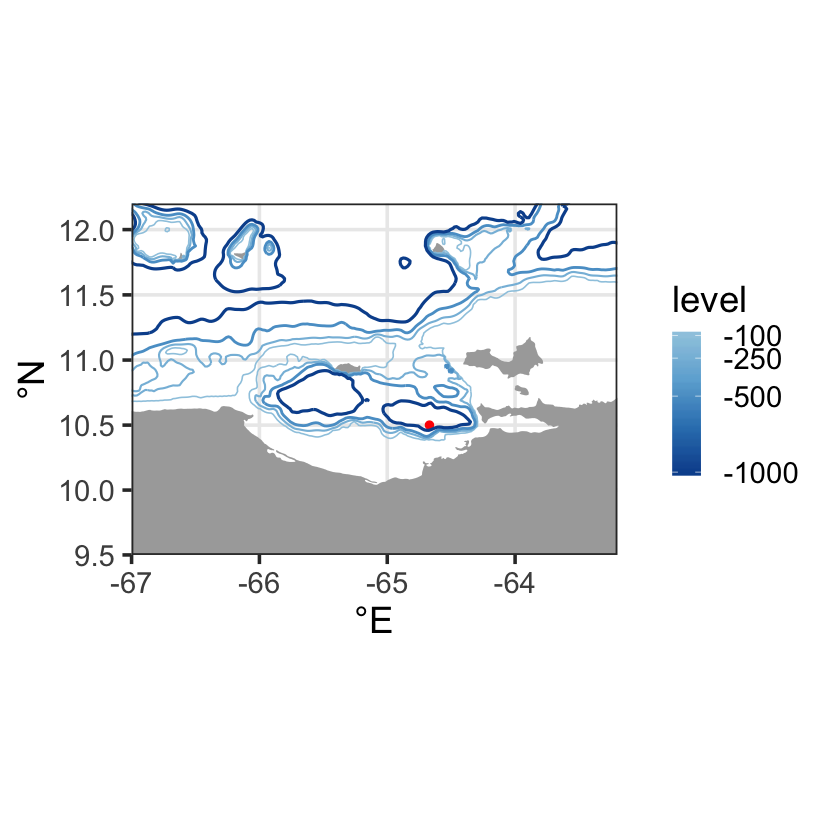

In [212]:
library(ggplot2)
library(mapdata)

# convert bathymetry to data frame
bf = fortify.bathy(b)

# get regional polygons
reg = map_data("world2Hires")
reg = subset(reg, region %in% c('Venezuela'))

# convert lat longs
reg$long = (360 - reg$long)*-1

# set map limits
lons = c(-67, -63.2)
lats = c(9.5, 12.2)

var_size = c(0.45, 0.6, 0.8, 0.9)  # c('100m'=0.45, '250m'=0.6, '500m'=0.8, '1000m'=0.9)
cbPalette <- pal[1:4]
breaks = c(-100,-250,-500,-1000)
fillbf <- bf

# make plot
ggplot()+

  # add depth color map
  #geom_tile(data=fillbf, aes(x=x,y=y,fill=z)) +
  #scale_fill_gradient(limits=c(-2000,0), high = 'lightblue', low = 'darkblue')+

  # add labels to depth contours
  scale_size_manual(values=var_size)+
  
  # add coastline
  geom_polygon(data = reg, aes(x = long, y = lat, group = group), 
               fill = "darkgrey", color = NA) + 
  
  # add polygon
  #geom_polygon(data = ply, aes(x = lon, y = lat),
  #             color = "black", alpha = 0.3) +
  
  # add line
  geom_path(data = lin, aes(x = lon, y = lat),
            colour = "black", alpha = 1, size=0.3)+
  
  # add points
  geom_point(data = pts, aes(x = lon, y = lat),
             colour = "red", fill = "red", 
             stroke = .5, size = 2, 
             alpha = 1, shape = 21)+
  
  # configure projection and plot domain
  coord_map(xlim = lons, ylim = lats)+
  #guides(colour=TRUE) +

  # add 100m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z, col=..level..),
               breaks=breaks[1],
               size=var_size[1])+
  
  # add 250m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z, col=..level..),
               breaks=breaks[2],
                  size=var_size[2])+

  # add 500m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z, col=..level..),
               breaks=breaks[3],
                  size=var_size[3])+

 # add 1000m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z, col=..level..),
               breaks=breaks[4],
               size=var_size[4])+


  scale_colour_gradientn(colours=cbPalette, aesthetics = 'colour', breaks=breaks)+

  # formatting
  ylab("°N")+xlab("°E")+
  theme_bw(base_size = 22)

In [213]:
ggsave('PLOTS/BathyMap01.pdf', width=8, height= 8)